<a href="https://colab.research.google.com/github/korukondadurgaprasad/Uber_data_Analysis/blob/main/Uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn

In [2]:
import umap

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import make_regression
from sklearn.datasets import load_digits

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from google.colab import files

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
uploaded = files.upload()

Saving uber.xlsx to uber.xlsx


In [5]:
uri = "/content/uber.xlsx"

In [6]:
df = pd.read_excel(uri)
df.head()

,Data da solicitação (local),Hora da solicitação (local),Serviço,Distância (mi),Duração (min),Grupo,Valor da transação em BRL (com tributos)
0,2020-01-18,01:33:00,Travel | UberX,10.18,21,Diretores,29.38
1,2020-01-18,11:19:00,Travel | UberX,2.25,12,--,8.79
2,2020-02-12,17:42:00,Travel | VIP,4.19,29,--,12.09
3,2020-02-13,04:49:00,Travel | UberX,12.41,29,Geral,28.46
4,2020-02-13,07:57:00,Travel | Comfort,22.72,46,Geral,74.95


In [7]:
df.shape

(43642, 7)

In [8]:
df.isna().sum()

,0
Data da solicitação (local),0
Hora da solicitação (local),0
Serviço,0
Distância (mi),0
Duração (min),0
Grupo,0
Valor da transação em BRL (com tributos),0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data da solicitação (local)               43642 non-null  datetime64[ns]
 1   Hora da solicitação (local)               43642 non-null  object        
 2   Serviço                                   43642 non-null  object        
 3   Distância (mi)                            43642 non-null  object        
 4   Duração (min)                             43642 non-null  object        
 5   Grupo                                     43642 non-null  object        
 6   Valor da transação em BRL (com tributos)  43642 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.3+ MB


In [10]:
df.describe()

,Data da solicitação (local),Valor da transação em BRL (com tributos)
count,43642,43642.000000
mean,2021-10-25 15:04:16.871820800,33.316943
min,2020-01-18 00:00:00,1.490000
25%,2021-06-22 00:00:00,14.970000
50%,2021-12-13 00:00:00,24.900000
75%,2022-05-13 00:00:00,40.530000
max,2022-08-31 00:00:00,573.810000
std,NaN,30.611027


In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
43637,False
43638,False
43639,False
43640,False


In [12]:
corr = df.select_dtypes(include=['number']).corr()

In [13]:
df.rename(columns = {'Data da solicitação (local)': 'data_solicitacao',
                    'Hora da solicitação (local)': 'hora_solicitacao', 'Serviço': 'categoria',
                    'Distância (mi)': 'distancia', 'Duração (min)': 'duracao', 'Grupo': 'grupo',
                    'Valor da transação em BRL (com tributos)': 'preco'}, inplace = True)
df.head()

,data_solicitacao,hora_solicitacao,categoria,distancia,duracao,grupo,preco
0,2020-01-18,01:33:00,Travel | UberX,10.18,21,Diretores,29.38
1,2020-01-18,11:19:00,Travel | UberX,2.25,12,--,8.79
2,2020-02-12,17:42:00,Travel | VIP,4.19,29,--,12.09
3,2020-02-13,04:49:00,Travel | UberX,12.41,29,Geral,28.46
4,2020-02-13,07:57:00,Travel | Comfort,22.72,46,Geral,74.95


In [14]:
df.shape

(43642, 7)

In [15]:
df.isna().sum()

,0
data_solicitacao,0
hora_solicitacao,0
categoria,0
distancia,0
duracao,0
grupo,0
preco,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_solicitacao  43642 non-null  datetime64[ns]
 1   hora_solicitacao  43642 non-null  object        
 2   categoria         43642 non-null  object        
 3   distancia         43642 non-null  object        
 4   duracao           43642 non-null  object        
 5   grupo             43642 non-null  object        
 6   preco             43642 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.3+ MB


In [17]:
## df['distancia'] = df['distancia'].astype(float)

In [18]:
print(df[df['distancia'] == "--"].shape[0]*100/df.shape[0],'%')

1.3633655652811512 %


In [19]:
df.drop(df[df['distancia'] == "--"].index, inplace = True)

In [20]:
df.shape

(43047, 7)

In [21]:
df['distancia'] = df['distancia'].astype(float)

In [22]:
df['duracao'] = df['duracao'].astype(int)

In [23]:
print(df[(df['grupo'] != 'Geral') & (df['grupo'] != 'Diretores')].shape[0]*100/df.shape[0],'%')

18.600599344902083 %


In [24]:
df['grupo'] = df['grupo'].replace('--', 'Geral')

In [25]:
df.drop(columns = 'hora_solicitacao', inplace = True)

In [26]:
df.head()

,data_solicitacao,categoria,distancia,duracao,grupo,preco
0,2020-01-18,Travel | UberX,10.18,21,Diretores,29.38
1,2020-01-18,Travel | UberX,2.25,12,Geral,8.79
2,2020-02-12,Travel | VIP,4.19,29,Geral,12.09
3,2020-02-13,Travel | UberX,12.41,29,Geral,28.46
4,2020-02-13,Travel | Comfort,22.72,46,Geral,74.95


In [27]:
df['dia_semana'] = df['data_solicitacao'].dt.day_name()
df.head()

,data_solicitacao,categoria,distancia,duracao,grupo,preco,dia_semana
0,2020-01-18,Travel | UberX,10.18,21,Diretores,29.38,Saturday
1,2020-01-18,Travel | UberX,2.25,12,Geral,8.79,Saturday
2,2020-02-12,Travel | VIP,4.19,29,Geral,12.09,Wednesday
3,2020-02-13,Travel | UberX,12.41,29,Geral,28.46,Thursday
4,2020-02-13,Travel | Comfort,22.72,46,Geral,74.95,Thursday


In [28]:
df.drop(columns = 'data_solicitacao', inplace = True)
df.head()

,categoria,distancia,duracao,grupo,preco,dia_semana
0,Travel | UberX,10.18,21,Diretores,29.38,Saturday
1,Travel | UberX,2.25,12,Geral,8.79,Saturday
2,Travel | VIP,4.19,29,Geral,12.09,Wednesday
3,Travel | UberX,12.41,29,Geral,28.46,Thursday
4,Travel | Comfort,22.72,46,Geral,74.95,Thursday


In [29]:
df['ticket_medio'] = df['preco'] / df['distancia']
df.head()

,categoria,distancia,duracao,grupo,preco,dia_semana,ticket_medio
0,Travel | UberX,10.18,21,Diretores,29.38,Saturday,2.886051
1,Travel | UberX,2.25,12,Geral,8.79,Saturday,3.906667
2,Travel | VIP,4.19,29,Geral,12.09,Wednesday,2.885442
3,Travel | UberX,12.41,29,Geral,28.46,Thursday,2.293312
4,Travel | Comfort,22.72,46,Geral,74.95,Thursday,3.298856


In [30]:
df.describe()

,distancia,duracao,preco,ticket_medio
count,43047.000000,43047.000000,43047.000000,4.304700e+04
mean,9.244175,26.328385,33.714128,inf
std,8.813901,20.490758,30.632266,NaN
min,0.000000,0.000000,3.950000,5.571587e-01
25%,3.300000,13.000000,15.230000,2.901199e+00
50%,6.910000,21.000000,24.920000,3.776786e+00
75%,12.100000,34.000000,41.030000,5.404336e+00
max,136.550000,447.000000,573.810000,inf


In [31]:
df[df['distancia'] == 0]

,categoria,distancia,duracao,grupo,preco,dia_semana,ticket_medio
893,Travel | UberX,0.0,0,Geral,9.00,Thursday,inf
894,Travel | UberX,0.0,0,Geral,9.00,Thursday,inf
2334,Travel | UberX,0.0,1,Geral,9.32,Thursday,inf
2535,Travel | UberX,0.0,5,Geral,5.35,Thursday,inf
3853,Travel | UberX,0.0,0,Geral,7.36,Friday,inf
11471,Travel | UberX,0.0,0,Geral,22.77,Monday,inf
34792,Travel | UberX,0.0,3,Geral,24.93,Thursday,inf
37136,Travel | Comfort,0.0,0,Geral,10.74,Monday,inf
37231,Travel | UberX,0.0,36,Geral,19.15,Tuesday,inf
37295,Travel | UberX,0.0,36,Geral,28.84,Tuesday,inf


In [32]:
df.drop(df[df['distancia'] == 0].index, inplace = True)

In [33]:
df.drop(columns = ['distancia', 'preco'], inplace = True)
df.head()

,categoria,duracao,grupo,dia_semana,ticket_medio
0,Travel | UberX,21,Diretores,Saturday,2.886051
1,Travel | UberX,12,Geral,Saturday,3.906667
2,Travel | VIP,29,Geral,Wednesday,2.885442
3,Travel | UberX,29,Geral,Thursday,2.293312
4,Travel | Comfort,46,Geral,Thursday,3.298856


In [34]:
df.shape

(43036, 5)

In [35]:
cols_num = ['duracao', 'ticket_medio']

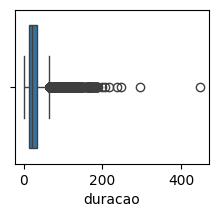

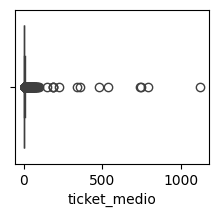

In [36]:
for i in cols_num:
    plt.figure(figsize = (2.5,2))
    sns.boxplot(x = df[i])
    plt.show()

In [37]:
cols_cat = ['categoria', 'grupo', 'dia_semana']

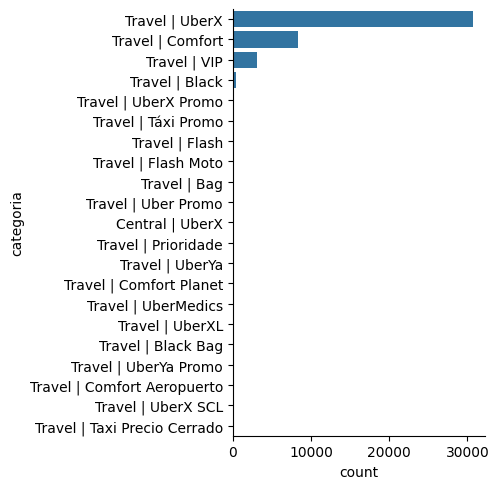

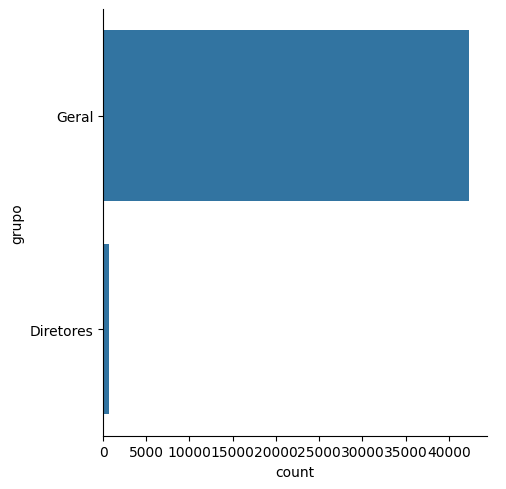

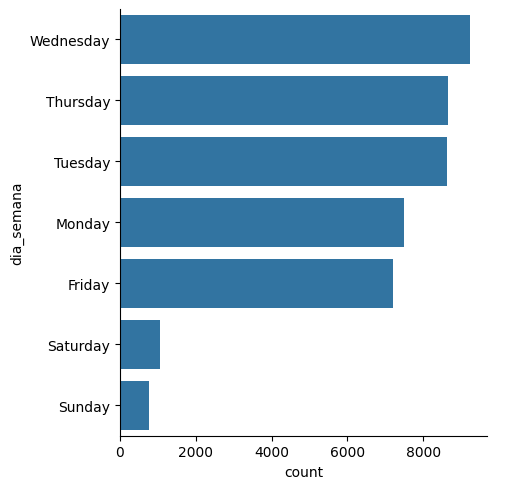

In [38]:
for i in cols_cat:
    fig = sns.catplot(data = df, y = i, kind = 'count', order = df[i].value_counts().index)
    ax = fig.facet_axis(0,0)
    for i in ax.containers:
        labels = [v.get_width() for v in i]

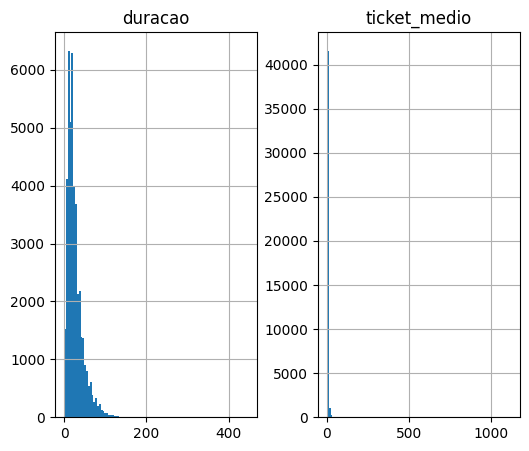

In [39]:
df.hist(bins=100, figsize=(6,5))
plt.show()

In [40]:
df['categoria'] = df['categoria'].replace(['Travel | UberX', 'Travel | VIP', 'Travel | Comfort',
                                            'Travel | UberMedics', 'Travel | Uber Promo', 'Travel | Bag',
                                            'Travel | Black', 'Travel | UberX Promo', 'Central | UberX',
                                            'Travel | Flash', 'Travel | Táxi Promo', 'Travel | Flash Moto',
                                            'Travel | Black Bag', 'Travel | Prioridade',
                                            'Travel | Comfort Planet', 'Travel | UberYa Promo',
                                            'Travel | UberYa', 'Travel | UberXL', 'Travel | Comfort Aeropuerto',
                                            'Travel | UberX SCL', 'Travel | Taxi Precio Cerrado'],
                                            ['x', 'x', 'comfort', 'outros', 'outros', 'outros', 'black', 'x',
                                            'x', 'flash', 'outros', 'flash', 'black', 'outros', 'comfort',
                                            'outros', 'outros', 'outros', 'outros', 'x', 'outros'])

In [41]:
# ax = plt.subplots()

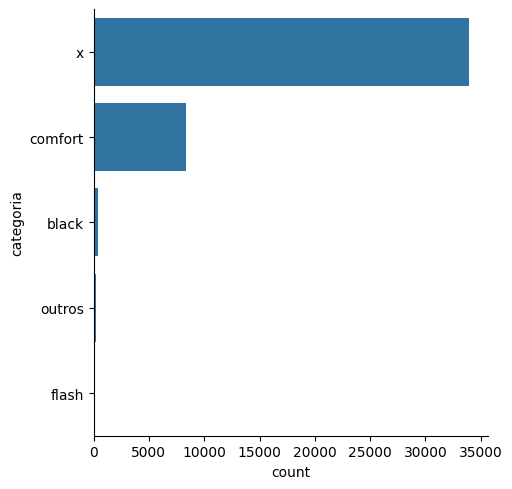

In [42]:
fig = sns.catplot(data = df, y = 'categoria', kind = 'count', order = df['categoria'].value_counts().index)
ax = fig.facet_axis(0,0)
for i in ax.containers:
    labels = [v.get_width() for v in i]
plt.show()

In [43]:
df_classe_x = df[df['categoria'] == 'x'].sample(2000)
df_classe_comfort = df[df['categoria'] == 'comfort'].sample(500)
df_classe_black = df[df['categoria'] == 'black']
df_classe_outros = df[df['categoria'] == 'outros']
df_classe_flash = df[df['categoria'] == 'flash']
df = pd.concat([df_classe_x, df_classe_comfort, df_classe_black, df_classe_outros, df_classe_flash])

In [44]:
df.shape

(3253, 5)

In [45]:
df_grupo = pd.DataFrame(OneHotEncoder().fit_transform(df[['grupo']]).toarray())
df_grupo.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [46]:
df.head()

,categoria,duracao,grupo,dia_semana,ticket_medio
13620,x,3,Geral,Friday,9.791667
35507,x,27,Geral,Thursday,2.909281
35944,x,58,Geral,Monday,3.394334
32394,x,14,Geral,Tuesday,4.376623
20742,x,50,Geral,Monday,3.359572


In [47]:
df = pd.concat([df.reset_index(), df_grupo], axis = 1)
df.drop(columns = ['index'], inplace = True)
df.head()

,categoria,duracao,grupo,dia_semana,ticket_medio,0,1
0,x,3,Geral,Friday,9.791667,0.0,1.0
1,x,27,Geral,Thursday,2.909281,0.0,1.0
2,x,58,Geral,Monday,3.394334,0.0,1.0
3,x,14,Geral,Tuesday,4.376623,0.0,1.0
4,x,50,Geral,Monday,3.359572,0.0,1.0


In [48]:
df.drop(columns = ['grupo', 1], inplace = True)
df.rename(columns = {0: 'diretores'}, inplace = True)
df.head()

,categoria,duracao,dia_semana,ticket_medio,diretores
0,x,3,Friday,9.791667,0.0
1,x,27,Thursday,2.909281,0.0
2,x,58,Monday,3.394334,0.0
3,x,14,Tuesday,4.376623,0.0
4,x,50,Monday,3.359572,0.0


In [49]:
df = pd.get_dummies(df, columns = ['dia_semana'], prefix = '', prefix_sep = '')
df.head()

,categoria,duracao,ticket_medio,diretores,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,x,3,9.791667,0.0,True,False,False,False,False,False,False
1,x,27,2.909281,0.0,False,False,False,False,True,False,False
2,x,58,3.394334,0.0,False,True,False,False,False,False,False
3,x,14,4.376623,0.0,False,False,False,False,False,True,False
4,x,50,3.359572,0.0,False,True,False,False,False,False,False


In [50]:
x = df.iloc[:, 0:-1]
y = df["ticket_medio"]

In [51]:
le = preprocessing.LabelEncoder()
x['categoria']  = le.fit_transform(x['categoria'])
x['duracao']  = le.fit_transform(x['duracao'])
x['diretores']  = le.fit_transform(x['diretores'])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [53]:
print(X_train.shape)

(2439, 10)


In [54]:
print(X_test.shape)

(814, 10)


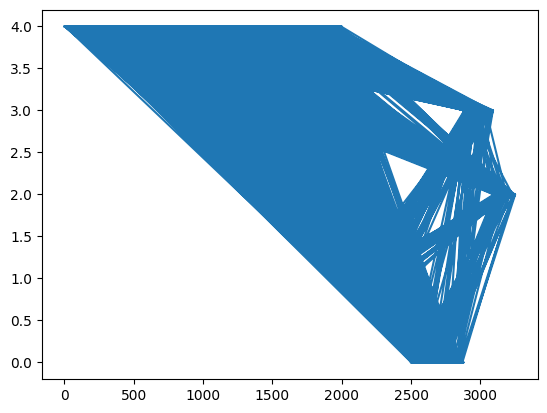

In [55]:
plt.plot(X_train.iloc[:, 0])
plt.show()

In [56]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

In [57]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

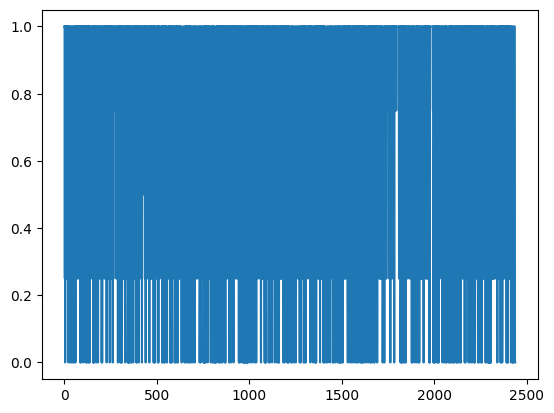

In [58]:
plt.plot(X_train[:, 0])
plt.show()

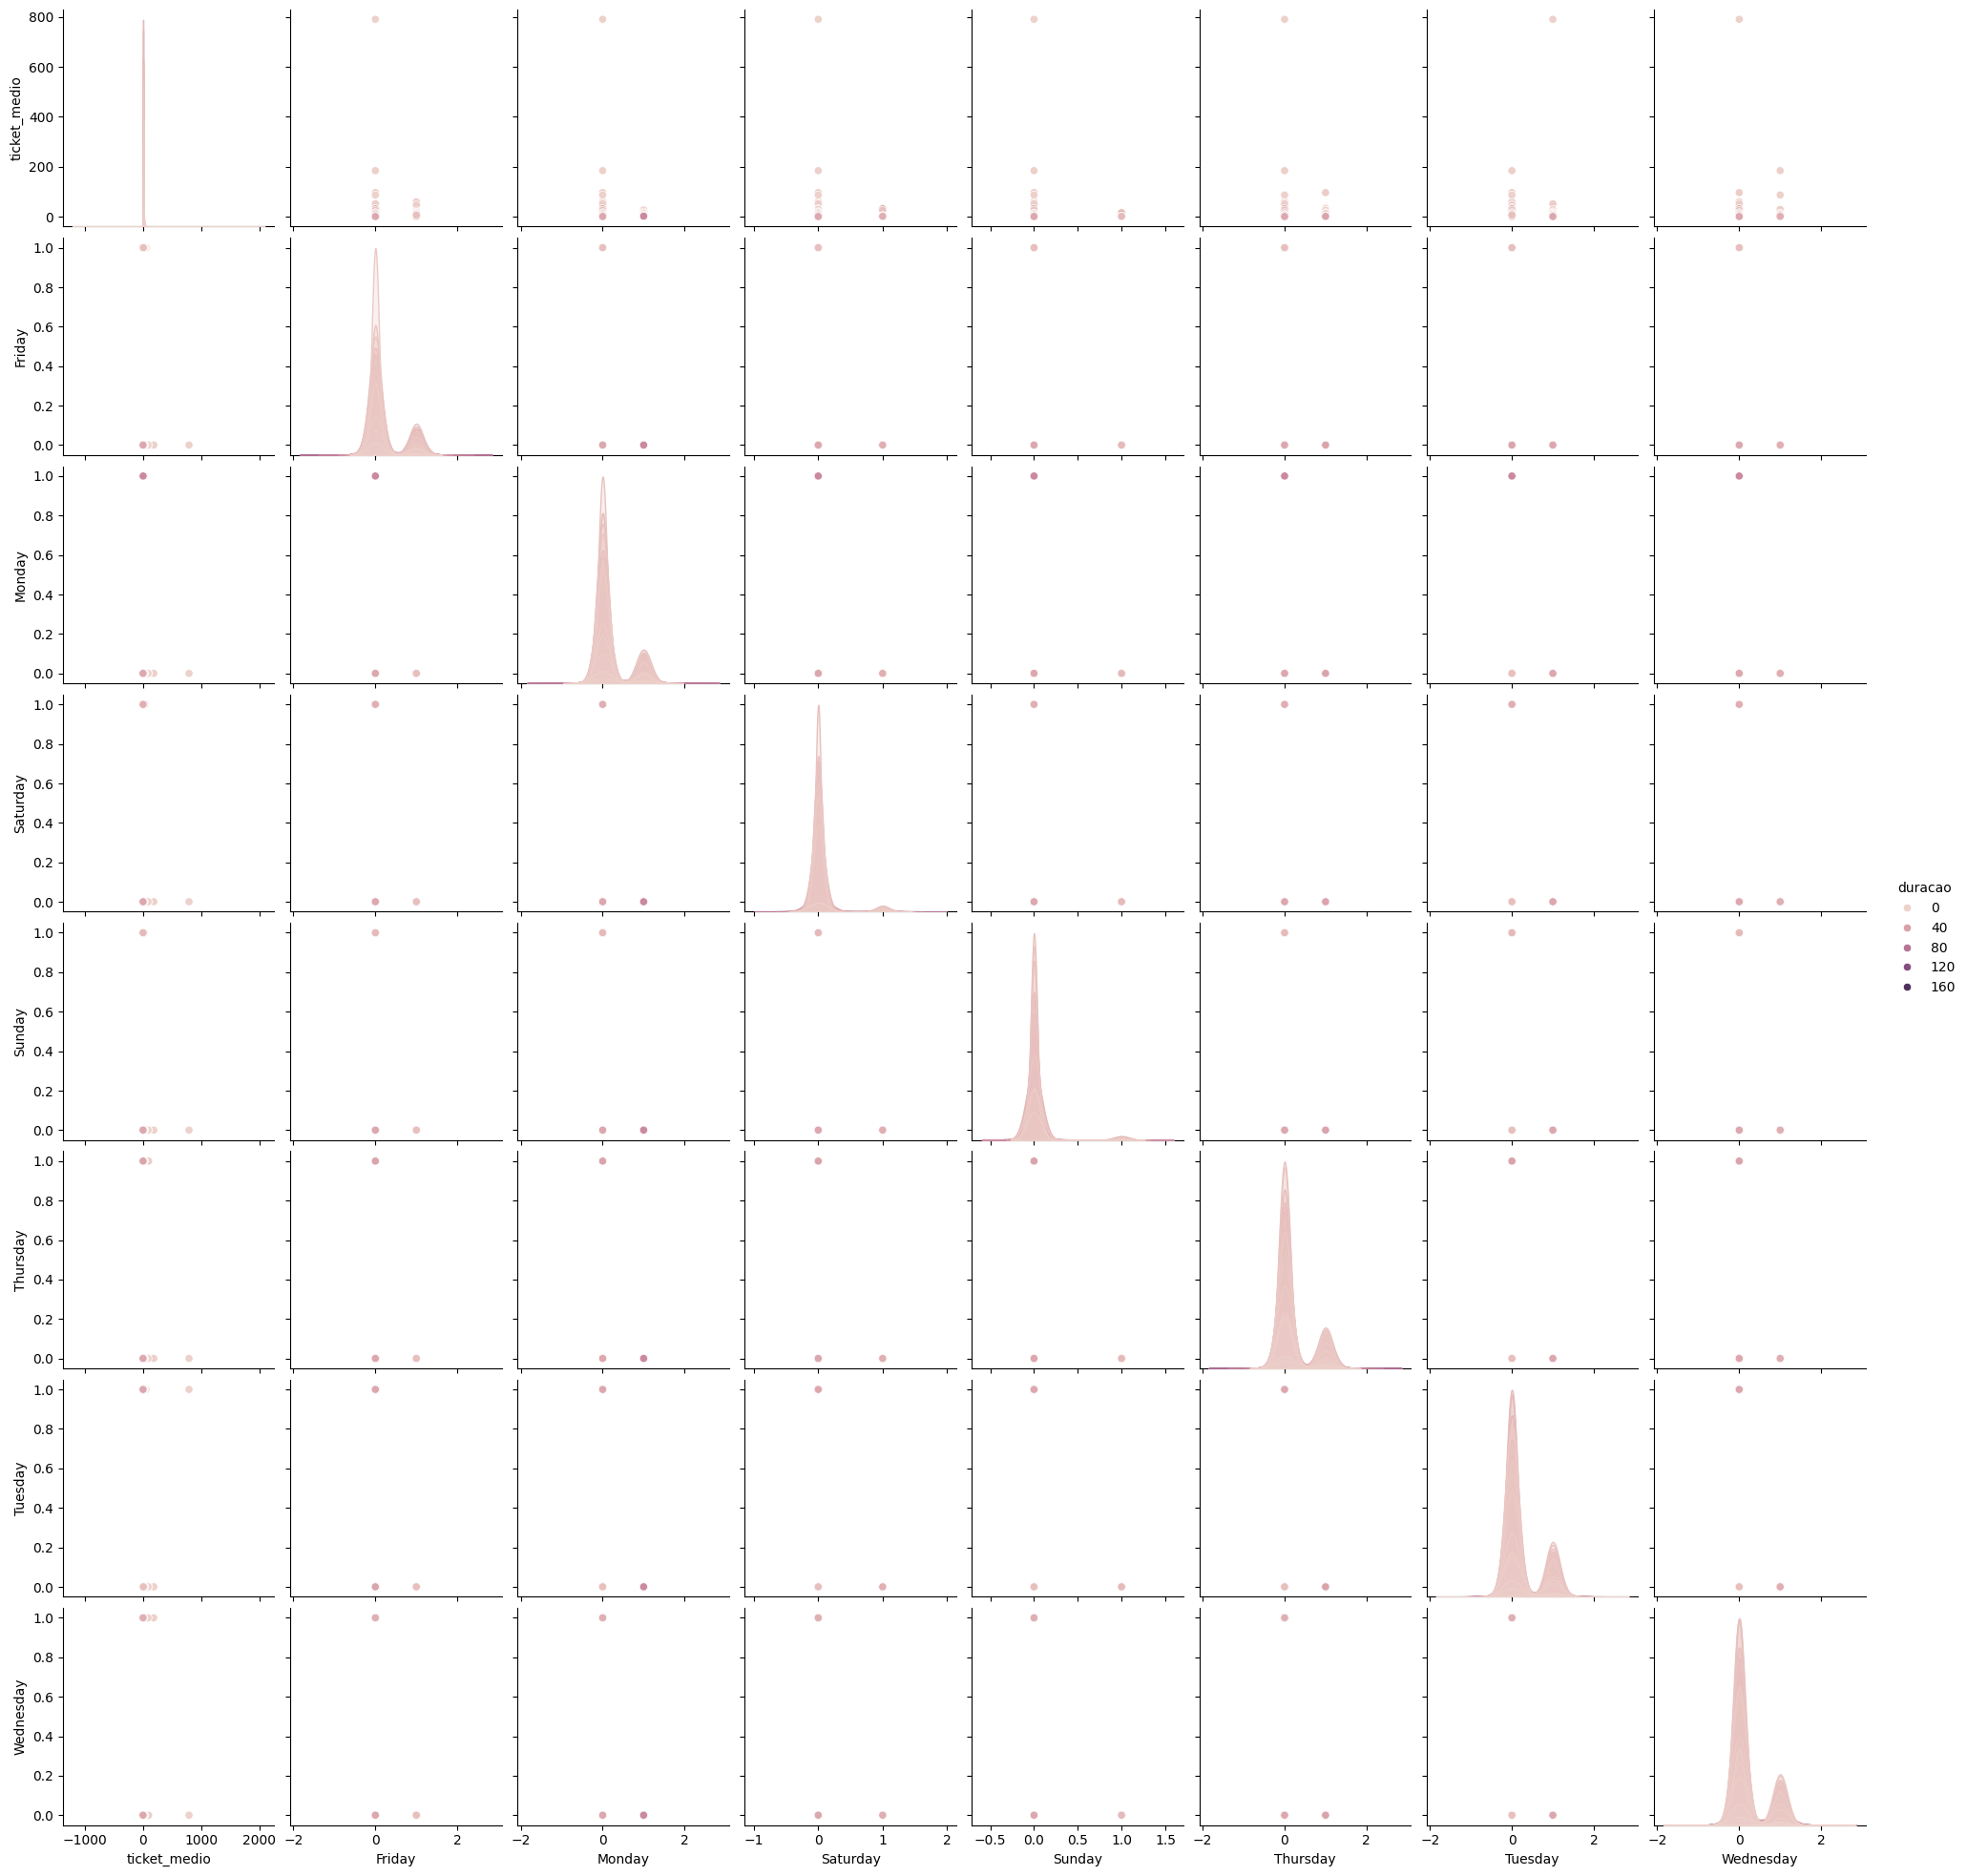

In [59]:
sns.pairplot(df.drop("diretores", axis=1), hue='duracao');

In [60]:
reducer = umap.UMAP()

In [61]:
df_data_uber = df[
    [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
].values
scaled_df_data_uber = StandardScaler().fit_transform(df_data_uber)

In [62]:
embedding = reducer.fit_transform(scaled_df_data_uber)

In [63]:
# embedding.info()

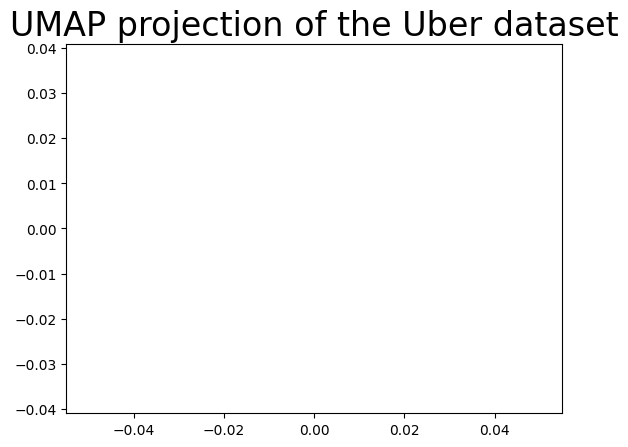

In [64]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Set1', c=df.Monday.map({"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}))

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Uber dataset', fontsize=24);

In [65]:
df.head()

,categoria,duracao,ticket_medio,diretores,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,x,3,9.791667,0.0,True,False,False,False,False,False,False
1,x,27,2.909281,0.0,False,False,False,False,True,False,False
2,x,58,3.394334,0.0,False,True,False,False,False,False,False
3,x,14,4.376623,0.0,False,False,False,False,False,True,False
4,x,50,3.359572,0.0,False,True,False,False,False,False,False


In [66]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

In [67]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

print(regr.predict(X_test))

[ 6.83842996  3.35037367  3.35037367  6.83842996  3.35037367  3.35037367
  3.35037367  7.0719098   6.83842996  3.35037367  3.35037367  6.83842996
  3.35037367 14.12105798  3.35037367  3.35037367 10.33249889  3.35037367
  3.35037367  3.35037367  3.35037367  3.35037367  6.83842996  3.35037367
  6.83842996  6.53879831  3.35037367  5.74370129  3.35037367  3.35037367
  3.35037367 17.14442315  6.83842996  3.35037367  3.35037367  3.35037367
  4.30944648  6.83842996  3.35037367  3.35037367  3.35037367  3.35037367
  6.83842996  3.35037367  3.35037367  6.83842996  5.95765258  6.83842996
  3.35037367  3.35037367  3.35037367  3.35037367  6.83842996  3.35037367
  3.35037367  3.35037367  3.35037367  6.83842996  3.35037367  3.35037367
  3.35037367  3.35037367 11.21775283  6.83842996  3.35037367  6.83842996
  3.35037367  3.35037367  3.35037367 10.72354255  3.35037367 10.72354255
  6.83842996  6.83842996  3.35037367  4.47959694  3.35037367 20.45039972
  3.35037367  3.35037367  3.35037367  3.35037367  3

In [68]:
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)

print("R2 teste: ", r2_score(y_pred_test, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred_test, y_test))

R2 teste:  -56.75427486681899
mean absolute error:  2.1237026679299755
